In [1]:
import networkx as nx
from matplotlib import rc
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

rc('font',**{'family':'serif','serif':['Computer Modern'],'size': 20})
rc('text', usetex=True)
import random as rn

In [2]:
Graph = nx.random_geometric_graph(250, 0.15)
pos = nx.get_node_attributes(Graph, 'pos')

d_min = 1
n_center = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < d_min:
        n_center = n
        d_min = d

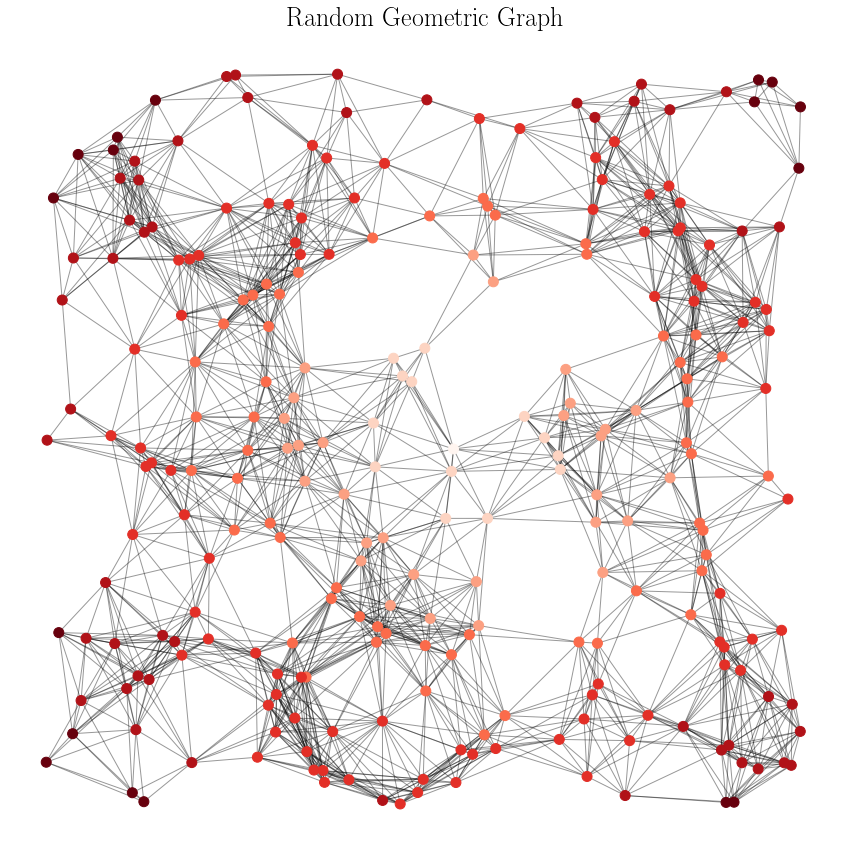

In [5]:
# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(Graph, n_center))

plt.figure(figsize=(15, 15))
plt.title('Random Geometric Graph', fontsize=26)
nx.draw_networkx_edges(Graph, pos, nodelist=[n_center], alpha=0.4)
nx.draw_networkx_nodes(Graph, pos, nodelist=list(p.keys()),
                       node_size=100,
                       node_color=-np.array(list(p.values())),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

In [6]:
print(nx.info(Graph))

Name: 
Type: Graph
Number of nodes: 250
Number of edges: 1931
Average degree:  15.4480


In [7]:
degree_dist = [degree for node, degree in Graph.degree]

short_path_dist = []
for source, source_lengths in nx.all_pairs_shortest_path_length(Graph):
    short_path_dist.extend(x[1] for x in source_lengths.items() if x[0] > source)

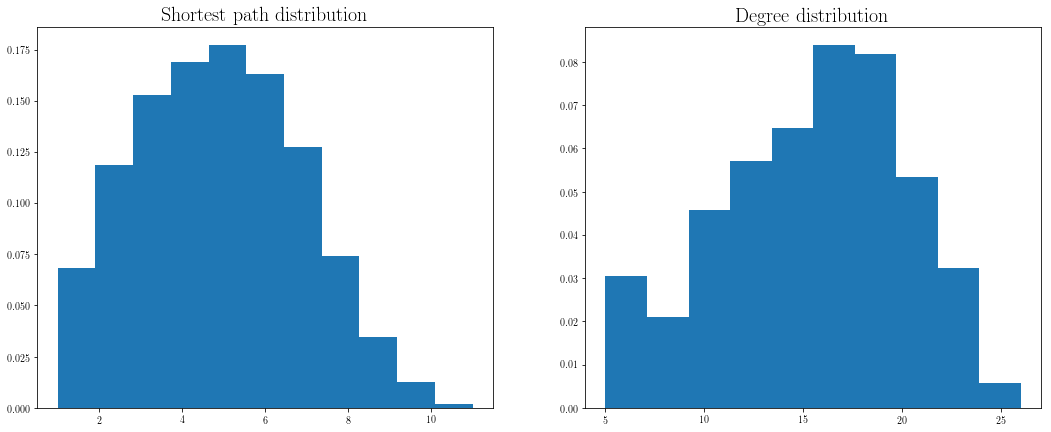

In [8]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
plt.hist(short_path_dist, bins=11, density=True)
plt.title('Shortest path distribution', fontsize=20)

plt.subplot(1, 2, 2)
plt.hist(degree_dist, density=True)
plt.title('Degree distribution', fontsize=20)
plt.show()